In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, BatchNormalization,Input, Flatten,  Conv1D, MaxPooling1D
from keras.layers import Dropout
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.python.ops import math_ops
from keras.optimizers import Adam
import keras
import tensorflow
from matplotlib import pyplot
from keras.callbacks import EarlyStopping
import pandas as pd 
from sklearn.preprocessing import LabelEncoder 
import pandas_ta as ta
import tensorflow.experimental.numpy as tnp
import scipy.stats as stats

           Effective date  \
0     2014-02-28 00:00:00   
1     2014-03-03 00:00:00   
2     2014-03-04 00:00:00   
3     2014-03-05 00:00:00   
4     2014-03-06 00:00:00   
...                   ...   
2590  2024-02-27 00:00:00   
2591  2024-02-28 00:00:00   
2592  2024-02-29 00:00:00   
2593  2024-03-01 00:00:00   
2594  2024-03-04 00:00:00   

      Dow Jones Sukuk Total Return Index (ex-Reinvestment)  
0                                                146.75     
1                                                146.76     
2                                                146.79     
3                                                146.63     
4                                                146.49     
...                                                 ...     
2590                                             196.57     
2591                                             196.60     
2592                                             196.76     
2593                                     

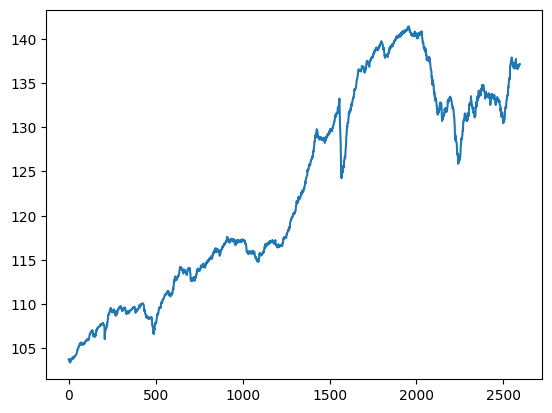

In [10]:
# Load data
folder_path = "CSV files/"
#"S&P Global High Yield Sukuk Index" "Dow Jones Sukuk Total Return Index (ex-Reinvestment)"
names = ["Dow Jones Sukuk Total Return Index (ex-Reinvestment)", "S&P Global High Yield Sukuk Index", "S&P MENA Bond and Sukuk Index", "S&P MENA Sukuk Index" ]
name = "Dow Jones Sukuk Total Return Index (ex-Reinvestment)"
data = {}
for name in names:
    data[name] = pd.read_csv(folder_path + name + ".csv")
    print(data[name]) 
# Extract features (date) and target (price)v
X = data[name]["Effective date"]
y = data[name][name]
pyplot.plot(data[name][name], label='Effective date')
pyplot.show()

In [12]:
# Adding indicators
for name in names:
    data[name]['EMAF']=ta.ema(data[name][name], length=15)
    data[name]['Price_diff'] = data[name][name].diff()
    data[name]['EMAF_diff'] = data[name]['EMAF'].diff()
    data[name]['Next_Price_diff'] = data[name][name].diff().shift(-1)
    data[name]['Next_EMAF_diff'] = data[name]['EMAF'].diff().shift(-1)
    data[name]['Next_Price'] = data[name][name].shift(-1)
    data[name].dropna(inplace=True)
    data[name].reset_index(inplace = True)
    print(data[name])

      level_0  index       Effective date  \
0          15     30  2014-04-11 00:00:00   
1          16     31  2014-04-14 00:00:00   
2          17     32  2014-04-15 00:00:00   
3          18     33  2014-04-16 00:00:00   
4          19     34  2014-04-17 00:00:00   
...       ...    ...                  ...   
2558     2573   2588  2024-02-23 00:00:00   
2559     2574   2589  2024-02-26 00:00:00   
2560     2575   2590  2024-02-27 00:00:00   
2561     2576   2591  2024-02-28 00:00:00   
2562     2577   2592  2024-02-29 00:00:00   

      Dow Jones Sukuk Total Return Index (ex-Reinvestment)        EMAF  \
0                                                147.32     147.015500   
1                                                147.32     147.053562   
2                                                147.25     147.078117   
3                                                147.29     147.104603   
4                                                147.35     147.135277   
...            